# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [2]:
# your code here
def random_sample(size, mean = 50, std_dev = 5):
    return norm.rvs(size=size, loc=mean, scale=std_dev)

r1 = random_sample(10)
r2 = random_sample(50)
r3 = random_sample(500)
r4 = random_sample(5000)

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [3]:
"""
The higher the sample is, the more the distribution approaches a normal distribution shape. This is because,
according to the Central Limit Theorem, when independent random variables are added, their properly normalized sum tends 
toward a normal distribution even if the original variables themselves are not normally distributed. 
"""

'\nThe higher the sample is, the more the distribution approaches a normal distribution shape. This is because,\naccording to the Central Limit Theorem, when independent random variables are added, their properly normalized sum tends \ntoward a normal distribution even if the original variables themselves are not normally distributed. \n'

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

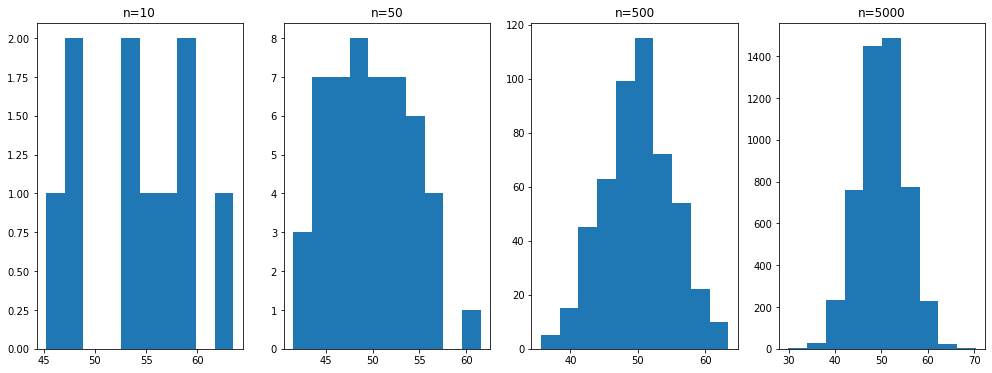

In [4]:
plt.figure(figsize=(17,6))
plt.subplot(1,4,1)
plt.hist(r1)
plt.title('n=10')
plt.subplot(1,4,2)
plt.hist(r2)
plt.title('n=50')
plt.subplot(1,4,3)
plt.hist(r3)
plt.title('n=500')
plt.subplot(1,4,4)
plt.hist(r4)
plt.title('n=5000')
plt.show()

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [5]:
# your code here
n=5
p=0.15
dist = binom(n,p)
print(dist.pmf(0)) ##The probability that 1 person clicks considering that 5 people watched and there is a 0.15 prob that 1
                        ##person clicks (out of 1) -- NOTE: remember that the 'index' of the first person is 0...

0.4437053125


#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

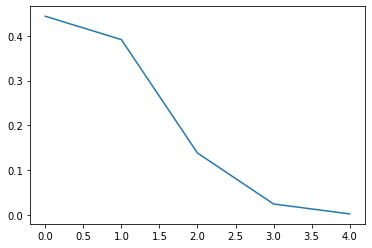

In [6]:
# run this code
x = range(n)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### Step 3: Explain what you observe from the plot above.

In [7]:
"""
Considering the probability of one person clicking on the advertising, we can moderately expect that 1 or 2 people out of
our 5 people sample click on it. The probability of 3 people clicking on it is considerably lower (around 0.1) and the 
probability of 5 people doing it tends to 0.
"""

'\nConsidering the probability of one person clicking on the advertising, we can moderately expect that 1 or 2 people out of\nour 5 people sample click on it. The probability of 3 people clicking on it is considerably lower (around 0.1) and the \nprobability of 5 people doing it tends to 0.\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

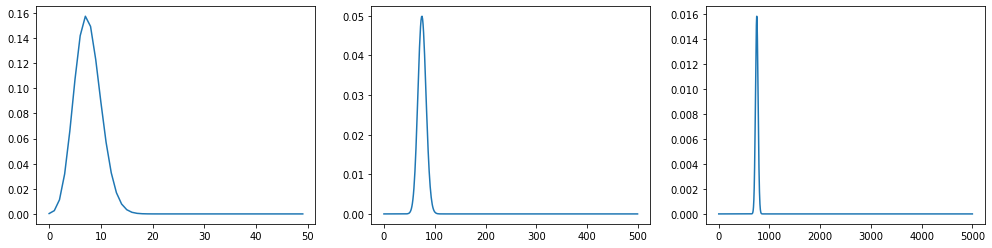

In [8]:
# your code here
visitors = [50, 500, 5000]
fig, ax = plt.subplots(1, 3, figsize = (17,4))
i=0
for quantity in visitors:
    n=quantity
    p=0.15
    dist = binom(n,p)
    x = range(n)
    ax[i].plot(x, dist.pmf(x))
    i+=1
plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [9]:
"""
The probability that no people click on the ad decreases as the sample grows. Even though the distribution is always skewed
to the left, the probability that a higher amount of people clicks on the add keeps increasing in every plot. It is important
to notice also that for bigger samples, the possibilities of no people clicking the add are just as low as the possibilities
of a majority of the sample clicking the add.
"""

'\nThe probability that no people click on the ad decreases as the sample grows. Even though the distribution is always skewed\nto the left, the probability that a higher amount of people clicks on the add keeps increasing in every plot. It is important\nto notice also that for bigger samples, the possibilities of no people clicking the add are just as low as the possibilities\nof a majority of the sample clicking the add.\n'

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
"""
The Poisson distribution shows the probability of observing exactly 'n' ocurrances of an independent event during an interval,
given we already know that we can expect the event to occur 'lambda' times over a specified interval (lambda here being an 
average of the occurrances per that interval).

We say interval and not time, because though the variable used is usually a time period, the Poisson distribution can also
be applied to other variables such as area or volume).

"""

"\nThe Poisson distribution shows the probability of observing exactly 'n' ocurrances of an independent event during an interval,\ngiven we already know that we can expect the event to occur 'lambda' times over a specified interval (lambda here being an \naverage of the occurrances per that interval).\n\nWe say interval and not time, because though the variable used is usually a time period, the Poisson distribution can also\nbe applied to other variables such as area or volume).\n\n"

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [13]:
# your code here
## pmf(k, mu, loc=0), being k the amount you want to receive in that time and mu the average received in that time
poisson.pmf(320, 300)


0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [14]:
# your code here
# pmf(k, mu, loc=0)
poisson.pmf(60, 300)


2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [15]:
# your code here

# arr = [lambda x : poisson.pmf(x, 300) for x in range(1001)]
arr = []
for x in range(1001):
    z = poisson.pmf(x, 300)
    arr.append(z)
arr

[5.148200222412013e-131,
 1.5444600667235709e-128,
 2.3166901000854342e-126,
 2.31669010008539e-124,
 1.7375175750640974e-122,
 1.042510545038448e-120,
 5.212552725192131e-119,
 2.23395116793948e-117,
 8.377316879773299e-116,
 2.7924389599243865e-114,
 8.377316879773059e-113,
 2.2847227853926804e-111,
 5.71180696348157e-110,
 1.318109299264997e-108,
 2.824519926996411e-107,
 5.649039853992778e-106,
 1.0591949726236754e-104,
 1.8691675987476173e-103,
 3.1152793312460596e-102,
 4.918862101967454e-101,
 7.378293152951289e-100,
 1.0540418789930416e-98,
 1.4373298349904852e-97,
 1.874778045639763e-96,
 2.3434725570497126e-95,
 2.812167068459659e-94,
 3.2448081559150323e-93,
 3.605342395461095e-92,
 3.8628668522797225e-91,
 3.996069157530829e-90,
 3.9960691575307916e-89,
 3.8671637008362115e-88,
 3.6254659695339394e-87,
 3.295878154121811e-86,
 2.908127783048746e-85,
 2.492680956898807e-84,
 2.0772341307490223e-83,
 1.684243889796562e-82,
 1.3296662287866792e-81,
 1.0228201759897706e-80,
 7.

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

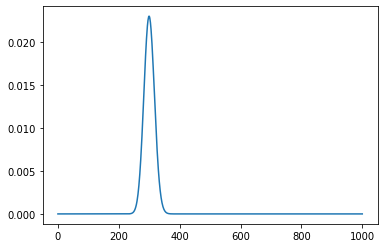

In [16]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [17]:
# your code here
'''
Our current sample is 200 packages.
We know that the distribution of the means of all samples tend to a normal distribution.
We need to calculate where will be the mean we are looking for now in the normal distribution (calculate how
many standard deviations away from the mean it is.
Then we can calculate the CDF to that point to calculate the probability that that is actually the mean.
σx² = σ²/n
σx = σ/n^(1/2)
μx - μ = the deviation of our sample mean vs the mean
σx = the standard deviation of our sample
How many standard deviations away are we?
'''
mean = 35
std_dev = 8
pack = 200
min_mean_today = 30
max_mean_today = 35
std_dev_normal = std_dev/pack**(1/2) ##All mean probabilities of all samples of a certain size create a normal distribution. 
                                    ##We are calculating that normal distribution, which mean is the same as the mean of the
                                    ##prob distribution of the population and its standard deviation is a relation between the
                                    ##std dev of the general prob distr and the size of the sample. For other sample sizes, the
                                    ##sampling distr of the sample mean would be different (though still a normal distribution)
prob = norm.cdf(max_mean_today, loc=35, scale=std_dev_normal) - norm.cdf(min_mean_today, loc=35, scale=std_dev_normal)
prob

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [18]:
# your code here
##We are looking for the probability that, for a sample of 200 packages, it takes more than a mean of ((115*60)/200) minutes 
##to deliver them

mean_115_for_200 = (115*60)/200
prob2 = 1 - (norm.cdf(mean_115_for_200, loc=35, scale=std_dev_normal))
prob2


0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [19]:
# your code here
more_than_300 = 1 - norm.cdf(300, loc=200, scale=40)
print(more_than_300)

0.006209665325776159


#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [20]:
# your code here
between_160_240 = norm.cdf(240, loc=200, scale=40) - norm.cdf(160, loc=200, scale=40)
print(between_160_240)

0.6826894921370859


#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [21]:
# your code here
less_150 = norm.cdf(150, loc=200, scale=40)
print(less_150)

0.10564977366685535


#### Step 4: Find the probability that the monthly sales exceed 3000.

In [22]:
# your code here
more_than_3000 = 1 - norm.cdf(3000, loc=200, scale=40)
print(more_than_3000)

0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [23]:
# your code here
# poisson.cdf(k, mu, loc=0)
no_robbery = poisson.cdf(0, 4)
no_robbery

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [24]:
# your code here
one_or_more = 1 - poisson.cdf(1, 4)
one_or_more

0.9084218055563291

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [25]:
# your code here
between_2_and_6 = poisson.cdf(6, 4) - poisson.cdf(2, 4)
between_2_and_6

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [26]:
# your code here
## If we assume that a month is 30 days, we can say that in 15 days mu = 2. 
more_than_2 = 1 - poisson.cdf(2, 2)
more_than_2

0.3233235838169366